In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
import math

In [ ]:
torch.manual_seed(1) 
x = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y = (np.sin(5*np.pi*x))/(5*np.pi*x)
print('Xshape:',x.shape,"\n Yshape:",y.shape)

Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


<ipython-input-92-7ea67d07552e>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)


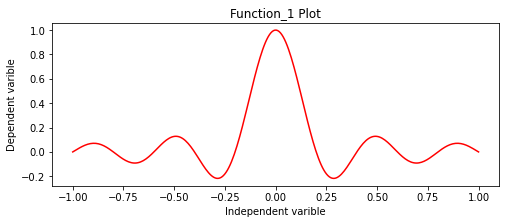

In [ ]:
x, y = torch.tensor(x, dtype=torch.float32), torch.tensor(y, dtype=torch.float32)
plt.figure(figsize=(8,3))
plt.plot(x, y, color = "red")
plt.title('Function_1 Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('function_1plt.png')


plt.show()

n_samples, n_features = x.shape

In [ ]:
class Model0(torch.nn.Module):
    def __init__(self,):
        super(Model0, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 5)   
        self.hidden2 = torch.nn.Linear(5, 10)
        self.hidden3 = torch.nn.Linear (10, 10)
        self.hidden4 = torch.nn.Linear (10, 10)
        self.hidden5 = torch.nn.Linear (10, 10)
        self.hidden6 = torch.nn.Linear (10, 10)
        self.hidden7 = torch.nn.Linear (10,5)
        self.predict = torch.nn.Linear(5, 1)   
       
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))    
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = F.leaky_relu(self.hidden5(x))
        x = F.leaky_relu(self.hidden6(x))
        x = F.leaky_relu(self.hidden7(x))
        x = self.predict(x)                  
        return x

m0 = Model0()     
optimizer = torch.optim.Adam(m0.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 

a=[]
for i in m0.parameters():
    a.append(torch.numel(i))
print('Parameters in Model 0:', np.sum(a),)

#Getting weights & bias
print("\nModel 0 weight and bias before training\n")
for param in m0.state_dict():
  print(param, "\t",m0.state_dict()[param])



Parameters in Model 0: 571

Model 0 weight and bias before training

hidden1.weight 	 tensor([[ 0.5153],
        [-0.4414],
        [-0.1939],
        [ 0.4694],
        [-0.9414]])
hidden1.bias 	 tensor([ 0.5997, -0.2057,  0.5087,  0.1390, -0.1224])
hidden2.weight 	 tensor([[ 0.1240,  0.0221,  0.1633, -0.1743, -0.0326],
        [-0.0403,  0.0648, -0.0018,  0.3909,  0.1392],
        [-0.1665, -0.2701, -0.0750, -0.1929, -0.1433],
        [ 0.0214,  0.2666,  0.2431, -0.4372,  0.2772],
        [ 0.1249,  0.4242,  0.2952, -0.4075, -0.4252],
        [-0.2157,  0.3927, -0.0745,  0.1914, -0.2078],
        [ 0.4388, -0.1892,  0.3354,  0.0053, -0.2356],
        [ 0.2299, -0.2374,  0.1315, -0.1291, -0.0490],
        [-0.4299, -0.2132,  0.2427, -0.1087,  0.4454],
        [ 0.3585, -0.0209, -0.2985,  0.2723,  0.1388]])
hidden2.bias 	 tensor([-0.2891,  0.2905,  0.2715,  0.3966, -0.2507, -0.0736, -0.0087,  0.0653,
        -0.3394, -0.3174])
hidden3.weight 	 tensor([[ 0.1720, -0.0742,  0.1545,  0.018

In [ ]:
def trainFunc(model,x,y):
    model.train()
    max_epoch = 20000
    epoch_arr,loss_arr=[],[]
    not_converged = True
    epoch = 0
    while not_converged:
        epoch += 1
        prediction = model(x)     
        loss = loss_func(prediction, y)   
        optimizer.zero_grad()   
        loss.backward()     
        optimizer.step() 
        epoch_arr.append(epoch)
        loss_arr.append(loss.detach().numpy())
        
        if epoch%100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}', end='\r', flush= True)
                
        if epoch == max_epoch:
                print("Max Epoch Reached")
                not_converged = False
        elif (epoch > 5) and  (loss_arr[-1] < 0.001):
            if abs(loss_arr[-3] - loss_arr[-2]) < 1.0e-05 and abs(loss_arr[-2] - loss_arr[-1]) < 1.0e-05:
                print(f"Convergence reached for loss:{loss_arr[-1]:.4f} at epoch: {epoch}")
                not_converged = False
                
    return epoch_arr,loss_arr,prediction


In [ ]:
Model0epoch_arr,Model0loss_arr,Model0prediction = trainFunc(m0,x,y)

Convergence reached for loss:0.0010 at epoch: 1481


In [ ]:
print("\nModel_0 weight and bias after training\n")
for param in m0.state_dict():
    print(param, "\t",m0.state_dict()[param])



Model_0 weight and bias after training

hidden1.weight 	 tensor([[ 0.3495],
        [-0.4980],
        [-0.2782],
        [ 0.6754],
        [-0.9233]])
hidden1.bias 	 tensor([0.3433, 0.0066, 0.1985, 0.0069, 0.0033])
hidden2.weight 	 tensor([[ 5.6558e-15,  4.0854e-15,  5.2744e-15,  3.3811e-14,  5.2855e-15],
        [ 1.8586e-01,  3.8488e-01, -2.4112e-01,  5.7788e-01,  5.5813e-01],
        [ 1.7123e-01,  1.4397e-01, -2.0044e-01,  3.6005e-01,  2.8130e-01],
        [ 1.4286e-01,  2.4826e-01, -2.2050e-01,  2.5787e-01,  4.8081e-01],
        [ 1.2995e-09,  2.0510e-06,  6.3490e-10, -8.2507e-07, -2.1821e-06],
        [-1.2514e-01,  1.1453e-01,  5.8076e-02,  5.2666e-02,  1.9721e-01],
        [ 2.8723e-01,  1.8996e-01, -1.6534e-01,  4.3383e-01,  2.6803e-01],
        [ 2.0542e-01,  2.4815e-01, -2.2562e-01,  5.1048e-01,  4.8801e-01],
        [-9.6953e-02,  5.3036e-02,  1.0853e-01,  1.4223e-02,  1.6168e-01],
        [ 5.5861e-02,  4.1072e-03, -2.3679e-02,  4.5424e-02,  1.2006e-02]])
hidden2.bias 	

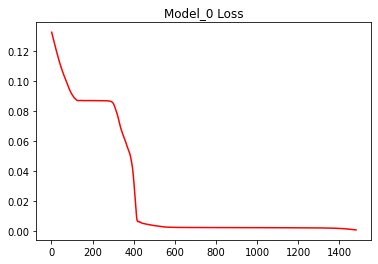

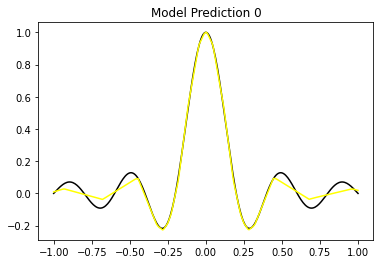

In [ ]:
plt.plot(Model0epoch_arr,Model0loss_arr,color="red")
plt.title('Model_0 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,Model0prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 0')
plt.show()

In [ ]:
class Model1(torch.nn.Module):
    def __init__(self,):
        super(Model1, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 10)  
        self.hidden2 = torch.nn.Linear (10, 18)
        self.hidden3 = torch.nn.Linear (18, 15)
        self.hidden4 = torch.nn.Linear (15, 4)
        self.predict = torch.nn.Linear(4, 1)   
      
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))      
        x = F.leaky_relu(self.hidden2(x))
        x = F.leaky_relu(self.hidden3(x))
        x = F.leaky_relu(self.hidden4(x))
        x = self.predict(x)               
        return x

m1 = Model1()   
optimizer = torch.optim.Adam(m1.parameters(), lr=0.0012, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 

a=[]
for i in m1.parameters():
    a.append(torch.numel(i))
print('Parameters in Model 1:', np.sum(a))


print("\nModel 1 weight and bias before training\n")
for param in m1.state_dict():
    print(param, "\t",m1.state_dict()[param])


Parameters in Model 1: 572

Model 1 weight and bias before training

hidden1.weight 	 tensor([[-0.1516],
        [-0.8101],
        [-0.7396],
        [-0.2935],
        [-0.2215],
        [ 0.1141],
        [-0.2243],
        [ 0.3690],
        [-0.3326],
        [ 0.7340]])
hidden1.bias 	 tensor([ 0.2297, -0.3074,  0.8912,  0.2553, -0.6796, -0.5565,  0.6270,  0.4567,
         0.7808, -0.0768])
hidden2.weight 	 tensor([[ 0.2212,  0.1572,  0.0978, -0.0732,  0.3048,  0.0640, -0.0816, -0.0045,
          0.3109,  0.2124],
        [-0.0234,  0.3100,  0.1389, -0.1684, -0.2878,  0.1838,  0.2966, -0.1842,
          0.1299,  0.0135],
        [-0.0676, -0.0860,  0.0880,  0.0697,  0.2136,  0.1158,  0.1439,  0.2790,
          0.0985,  0.0469],
        [-0.1151,  0.2319,  0.0467,  0.2038,  0.3054, -0.0707,  0.2227, -0.0642,
          0.2854,  0.2489],
        [-0.1133,  0.0113, -0.1381, -0.1279, -0.0640, -0.0022, -0.1102, -0.2985,
         -0.1913, -0.0270],
        [-0.1009,  0.2349,  0.2570,  0.

In [ ]:
Model1epoch_arr,Model1loss_arr,Model1prediction = trainFunc(m1,x,y)

Convergence reached for loss:0.0010 at epoch: 862


In [ ]:
print("\nModel 1 weight and bias after training\n")
for param in m1.state_dict():
    print(param, "\t",m1.state_dict()[param])    


Model 1 weight and bias after training

hidden1.weight 	 tensor([[-2.4021e-01],
        [-1.3579e+00],
        [-1.1285e+00],
        [-7.8486e-01],
        [-2.8853e-05],
        [-1.2443e-04],
        [-4.4810e-01],
        [ 9.5000e-01],
        [-4.1663e-01],
        [ 1.1676e+00]])
hidden1.bias 	 tensor([ 0.2114, -0.0221,  0.7714,  0.1551, -0.1006, -0.0455,  0.5476,  0.4625,
         0.7265,  0.0051])
hidden2.weight 	 tensor([[ 1.3292e-01,  2.6311e-02,  1.7586e-02, -3.1097e-01,  2.0331e-02,
          6.4955e-04, -1.3377e-01,  8.1059e-02,  2.4987e-01,  4.1067e-01],
        [ 3.9150e-02,  7.2189e-01,  2.1242e-01, -3.7784e-03, -2.6032e-03,
          3.5797e-03,  3.4000e-01, -4.5577e-01,  1.7217e-01, -2.7709e-03],
        [-8.5870e-03, -1.0615e-02,  1.4426e-01,  1.0204e-01,  5.9580e-03,
          2.9697e-04,  1.9363e-01,  3.1784e-01,  1.5261e-01,  1.0990e-01],
        [-1.3824e-01,  1.9284e-02, -9.5602e-03,  1.0541e-01,  4.0867e-03,
         -2.8937e-05,  1.7182e-01, -6.8812e-02,  2.

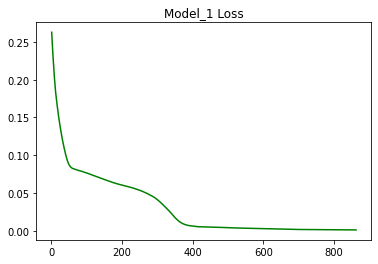

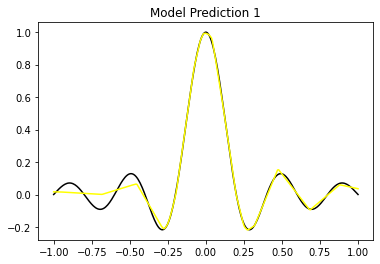

In [ ]:
plt.plot(Model1epoch_arr,Model1loss_arr,color="green")
plt.title('Model_1 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,Model1prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 1')
plt.show()

In [ ]:
class Model2(torch.nn.Module):
    def __init__(self,):
        super(Model2, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 190)   
        self.predict = torch.nn.Linear(190, 1) 
        
    def forward(self, x):
        x = F.leaky_relu(self.hidden1(x))     
        x = self.predict(x)                 
        return x

m2 = Model2()     
optimizer = torch.optim.Adam(m2.parameters(), lr=0.0011, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()

a=[]
for i in m2.parameters():
    a.append(torch.numel(i))
print('Parameters in Model 2:', np.sum(a))

print("\nModel 2 weight and bias before training\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])

Parameters in Model 2: 571

Model 2 weight and bias before training

hidden1.weight 	 tensor([[-0.0454],
        [ 0.1646],
        [-0.2346],
        [-0.6331],
        [-0.4523],
        [-0.0664],
        [-0.8181],
        [-0.8082],
        [ 0.1097],
        [-0.6507],
        [-0.5439],
        [-0.0086],
        [-0.5270],
        [ 0.9256],
        [-0.3610],
        [-0.5560],
        [-0.2664],
        [-0.8159],
        [ 0.5152],
        [ 0.8592],
        [-0.5767],
        [-0.3717],
        [ 0.9333],
        [-0.7234],
        [ 0.2708],
        [-0.8148],
        [-0.8900],
        [ 0.0015],
        [-0.5707],
        [ 0.5416],
        [-0.3093],
        [ 0.0099],
        [-0.5221],
        [ 0.4109],
        [ 0.9265],
        [-0.1503],
        [-0.6172],
        [-0.9753],
        [ 0.9583],
        [ 0.4215],
        [ 0.4130],
        [ 0.1703],
        [ 0.5018],
        [ 0.3551],
        [ 0.4883],
        [ 0.6254],
        [ 0.1418],
        [ 0.8613],
  

In [ ]:
Model2epoch_arr,Model2loss_arr,Model2prediction = trainFunc(m2,x,y)

Convergence reached for loss:0.0010 at epoch: 2179


In [ ]:
print("\nModel 2 weight and bias after training\n")
for param in m2.state_dict():
    print(param, "\t",m2.state_dict()[param])    


Model 2 weight and bias after training

hidden1.weight 	 tensor([[-2.1516e-03],
        [ 1.8310e-10],
        [-6.2759e-02],
        [-5.1061e-01],
        [-7.6890e-01],
        [ 4.0617e-08],
        [-1.0284e+00],
        [-1.3187e+00],
        [-2.4645e-03],
        [-1.5920e-05],
        [-6.4676e-01],
        [ 2.5906e-11],
        [-1.4016e-07],
        [ 9.0176e-01],
        [-9.6513e-01],
        [-3.9964e-01],
        [-5.8815e-01],
        [-3.6745e-01],
        [ 1.1658e+00],
        [ 1.8603e-01],
        [-1.0177e+00],
        [-8.4060e-02],
        [ 4.0922e-01],
        [-1.0326e-04],
        [ 6.0596e-02],
        [-6.8177e-01],
        [-5.8241e-01],
        [ 2.3696e-03],
        [-1.0838e-01],
        [ 2.3038e-02],
        [-1.1725e-02],
        [ 9.5199e-04],
        [-8.6905e-01],
        [ 1.7173e-03],
        [ 5.6426e-01],
        [-4.0857e-02],
        [-1.0581e+00],
        [-1.5753e+00],
        [ 1.2701e+00],
        [ 3.2838e-09],
        [ 2.5790e-01],

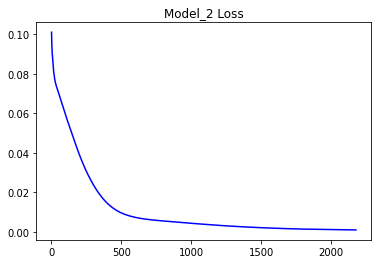

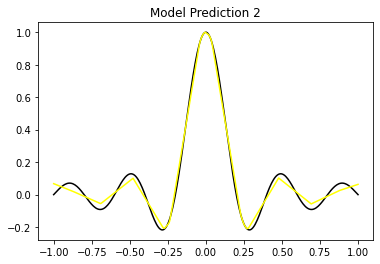

In [ ]:
plt.plot(Model2epoch_arr,Model2loss_arr,color="blue")
plt.title('Model_2 Loss')
plt.show()
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,Model2prediction.data.numpy(),color="yellow")
plt.title('Model Prediction 2')
plt.show()


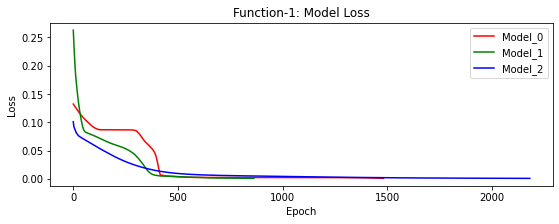

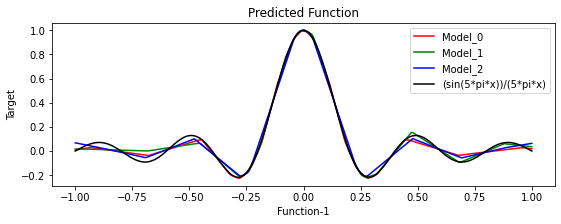

In [ ]:
plt.figure(figsize=(9,3))
plt.plot(Model0epoch_arr,Model0loss_arr, color = "red")
plt.plot(Model1epoch_arr,Model1loss_arr, color = "green")
plt.plot(Model2epoch_arr,Model2loss_arr, color = "blue")
plt.title('Function-1: Model Loss')
plt.legend(['Model_0', 'Model_1','Model_2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss.png')
plt.show()

plt.figure(figsize=(9,3))
plt.plot(x,Model0prediction.data.numpy(),color="red")
plt.plot(x,Model1prediction.data.numpy(),color="green")
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.plot(x,y.numpy(),color="black")
plt.title('Predicted Function')
plt.legend(['Model_0', 'Model_1','Model_2','(sin(5*pi*x))/(5*pi*x)'])
plt.xlabel('Function-1')
plt.ylabel('Target')
plt.savefig('Model_Prediction of fun1.png')
plt.show()

Function_2:


In [ ]:
#Function_2:

torch.manual_seed(1) 
x2 = torch.unsqueeze(torch.linspace(-1, 1, 300), dim=1)
y2 = np.sign(np.sin(5*np.pi*x))
print('Xshape:',x.shape,"\n Yshape:",y.shape)
x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)


Xshape: torch.Size([300, 1]) 
 Yshape: torch.Size([300, 1])


<ipython-input-107-a9972e60e10f>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x2, y2 = torch.tensor(x2, dtype=torch.float32), torch.tensor(y2, dtype=torch.float32)


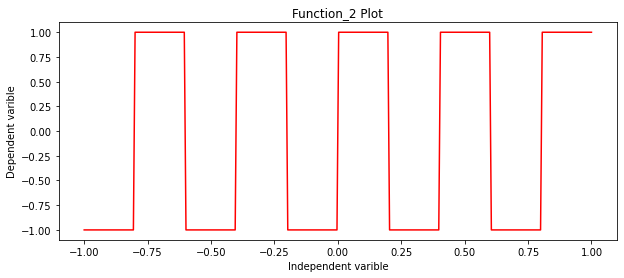

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(x2, y2, color = "red")
plt.title('Function_2 Plot')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.savefig('function_2plt.png')

plt.show()

n_samples, n_features = x2.shape

In [ ]:
f2_m0 = Model0()     
optimizer = torch.optim.Adam(f2_m0.parameters(), lr=0.009, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 

F2M0epoch_arr,F2M0loss_arr,F2M0prediction = trainFunc(f2_m0,x2,y2)

Max Epoch Reached


In [ ]:
print("\nFunction-2: Model 0 weight and bias after training\n")
for param in f2_m0.state_dict():
    print(param, "\t",f2_m0.state_dict()[param])


Function-2: Model 0 weight and bias after training

hidden1.weight 	 tensor([[ 0.0173],
        [-0.7104],
        [-1.0256],
        [ 2.1567],
        [-2.1496]])
hidden1.bias 	 tensor([ 0.4201,  0.1354,  0.3671, -0.4097,  0.0074])
hidden2.weight 	 tensor([[-4.3436e-04,  1.8871e-04, -3.9899e-04,  4.9061e-04, -3.9794e-05],
        [-7.5577e-01,  1.2208e-01, -2.9019e-01,  5.9639e-02,  8.1994e-01],
        [-1.6554e-01, -4.1488e-02, -1.9710e-01,  2.8418e-02,  3.5694e-01],
        [ 3.1151e-01, -7.0383e-03, -5.7237e-01, -5.8416e-01,  2.8263e-01],
        [ 7.1552e-02,  8.4037e-01,  8.3817e-01, -2.5387e+00, -1.1329e+00],
        [-2.5426e-01,  5.9854e-01,  6.2475e-01, -3.7371e-01,  1.1872e+00],
        [ 2.9518e-01, -4.5725e-01, -4.6396e-01, -1.0092e+00,  1.3734e-01],
        [-1.8689e-01, -6.2463e-02, -1.9999e-01,  2.7926e-02,  3.6758e-01],
        [-9.5657e-01,  4.2985e-02, -2.5969e-01,  2.5429e-02,  1.0112e+00],
        [ 3.2835e-01,  3.1687e-02,  3.6113e-01,  8.7387e-01, -8.0852e-01]

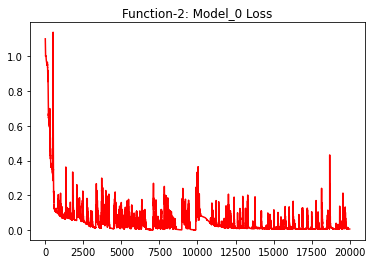

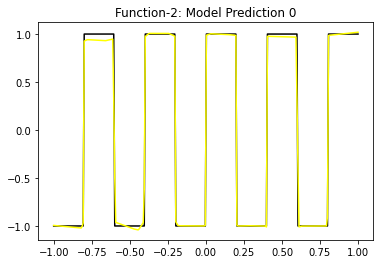

In [ ]:
plt.plot(F2M0epoch_arr,F2M0loss_arr,color="red")
plt.title('Function-2: Model_0 Loss')
plt.show()
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M0prediction.data.numpy(),color="yellow")
plt.title('Function-2: Model Prediction 0')
plt.show()

In [ ]:
f2_m1 = Model1()   
optimizer = torch.optim.Adam(f2_m1.parameters(), lr=0.009, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss() 

F2M1epoch_arr,F2M1loss_arr,F2M1prediction = trainFunc(f2_m1,x2,y2)

print("Max epoch reached, where epoch =20000")

Max Epoch Reached
Max epoch reached, where epoch =20000


In [ ]:
print("\nFunction-2: Model 1 weight and bias after training\n")
for param in f2_m1.state_dict():
    print(param, "\t",f2_m1.state_dict()[param])


Function-2: Model 1 weight and bias after training

hidden1.weight 	 tensor([[-1.2203],
        [-2.3708],
        [-1.1028],
        [-0.3908],
        [-0.8447],
        [ 0.0198],
        [-0.6951],
        [ 0.8404],
        [-0.0076],
        [ 1.7542]])
hidden1.bias 	 tensor([ 0.4953, -0.3428,  0.8914,  0.3158, -0.6274, -0.0169,  0.4207,  0.6794,
        -0.0121, -0.9797])
hidden2.weight 	 tensor([[-2.8211e-01,  1.2087e+00, -1.1740e-01, -1.8564e-01, -5.1835e+00,
         -1.5956e-02, -2.4858e-01,  7.2761e-01,  1.1060e-01, -4.2935e-01],
        [-4.3272e-01,  7.6262e-01,  1.7878e-01, -4.2037e-02, -3.7394e-01,
          1.6194e-03,  3.0120e-01,  3.8710e-01,  2.0714e-02, -7.9850e-01],
        [-3.8006e-01, -1.4175e-01,  1.8477e-01,  1.3528e-01,  1.2553e-01,
          6.7900e-04,  1.6628e-01,  1.9938e-02,  2.5024e-03, -1.6485e+00],
        [-3.6508e-01, -1.0240e+00,  4.2726e-01,  3.9637e-01,  2.2701e-02,
         -1.4971e-02,  3.1216e-01, -1.1070e-01,  4.1129e-02, -2.0516e+00],
    

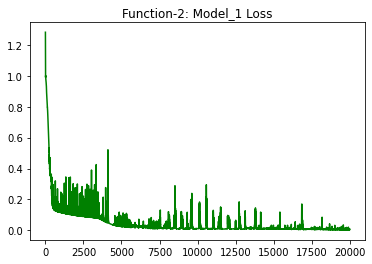

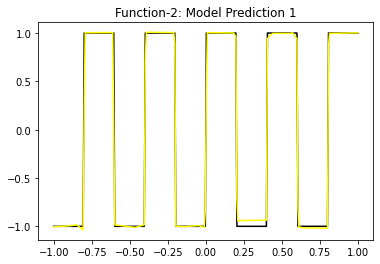

In [ ]:
plt.plot(F2M1epoch_arr,F2M1loss_arr,color="green")
plt.title('Function-2: Model_1 Loss')
plt.show()
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M1prediction.data.numpy(),color="yellow")
plt.title('Function-2: Model Prediction 1')
plt.show()

In [ ]:
f2_m2 = Model2()     # re-initialize the network
optimizer = torch.optim.Adam(f2_m2.parameters(), lr=0.009, weight_decay = 1e-4)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss
F2M2epoch_arr,F2M2loss_arr,F2M2prediction = trainFunc(f2_m2,x2,y2)

Max Epoch Reached


In [ ]:
print("\nFunction-2: Model 2 weight and bias after training\n")
for param in f2_m2.state_dict():
    print(param, "\t",f2_m2.state_dict()[param])


Function-2: Model 2 weight and bias after training

hidden1.weight 	 tensor([[ 1.6492e-04],
        [ 1.9094e+00],
        [-1.7141e-02],
        [-2.1439e+00],
        [-1.1190e+00],
        [ 1.2393e+00],
        [-2.2277e+00],
        [-1.6919e+00],
        [-5.6718e-15],
        [ 9.8091e-01],
        [-2.0821e+00],
        [-8.9314e-15],
        [-1.9809e+00],
        [ 1.9469e+00],
        [-1.8933e+00],
        [-2.2818e+00],
        [-8.2308e-01],
        [-9.6646e-01],
        [ 1.4852e+00],
        [ 1.8502e+00],
        [-2.0444e+00],
        [ 1.0063e-40],
        [ 2.1616e+00],
        [-1.6230e+00],
        [-3.9944e-15],
        [-2.4347e+00],
        [-2.4398e+00],
        [ 4.4871e-18],
        [ 6.6606e-07],
        [ 1.4752e+00],
        [ 7.9381e-04],
        [-3.0622e-19],
        [-2.0841e+00],
        [ 5.0896e-05],
        [ 3.4828e+00],
        [ 6.3868e-18],
        [-2.0800e+00],
        [-1.6414e+00],
        [ 2.5141e+00],
        [-1.5204e-40],
        [ 

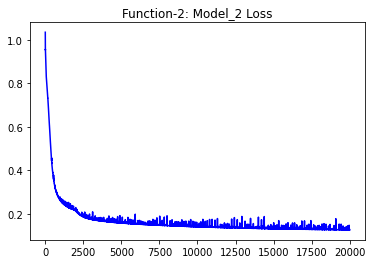

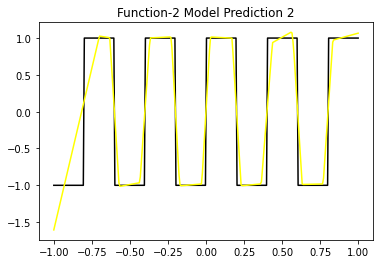

In [ ]:
plt.plot(F2M2epoch_arr,F2M2loss_arr,color="blue")
plt.title('Function-2: Model_2 Loss')
plt.show()
plt.plot(x2.numpy(),y2.numpy(),color="black")
plt.plot(x2,F2M2prediction.data.numpy(),color="yellow")
plt.title('Function-2 Model Prediction 2')
plt.show()

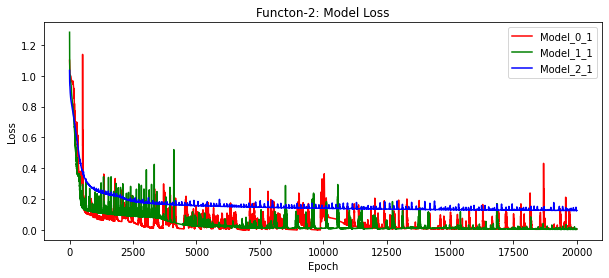

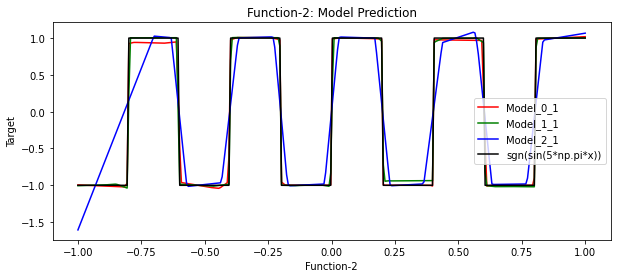

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(F2M0epoch_arr,F2M0loss_arr, color = "red")
plt.plot(F2M1epoch_arr,F2M1loss_arr, color = "green")
plt.plot(F2M2epoch_arr,F2M2loss_arr, color = "blue")
plt.title('Functon-2: Model Loss')
plt.legend(['Model_0_1', 'Model_1_1','Model_2_1'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('EpochVSLoss.png')
plt.show()

plt.figure(figsize=(10,4))
plt.plot(x2,F2M0prediction.data.numpy(),color="red")
plt.plot(x2,F2M1prediction.data.numpy(),color="green")
plt.plot(x2,F2M2prediction.data.numpy(),color="blue")
plt.plot(x2,y2.numpy(),color="black")
plt.title('Function-2: Model Prediction')
plt.legend(['Model_0_1', 'Model_1_1','Model_2_1','sgn(sin(5*np.pi*x))'])
plt.xlabel('Function-2')
plt.ylabel('Target')
plt.savefig('Model_Prediction of fun2.png')
plt.show()